In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_card = pd.read_csv('creditcard.csv')
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,245601.000000,245601.000000,245601.000000,245601.000000,245601.000000,245601.000000,245601.000000,245601.000000,245601.000000,245601.000000,...,245601.000000,245600.000000,245600.000000,245600.000000,245600.000000,245600.000000,245600.000000,245600.000000,245600.000000,245600.000000
mean,84100.177438,-0.043878,-0.019547,0.114126,0.029957,-0.041684,0.020474,-0.016718,0.001921,0.001093,...,-0.002872,-0.013349,-0.007133,0.000727,0.024349,0.001784,-0.000913,0.000992,91.033723,0.001828
std,42147.838726,1.961548,1.672675,1.505940,1.415156,1.376978,1.325868,1.228648,1.198433,1.114458,...,0.739842,0.715181,0.640215,0.606488,0.514354,0.485980,0.402632,0.334605,252.602241,0.042718
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,49815.000000,-0.939484,-0.607357,-0.693656,-0.833469,-0.730162,-0.745197,-0.564340,-0.200834,-0.656634,...,-0.225626,-0.534212,-0.165440,-0.350210,-0.288756,-0.330334,-0.070521,-0.050077,6.000000,0.000000
50%,76692.000000,-0.009005,0.062184,0.305818,0.019751,-0.099435,-0.248624,0.019483,0.029589,-0.060559,...,-0.031992,-0.003622,-0.019048,0.045625,0.056638,-0.058891,0.002425,0.014284,23.320000,0.000000
75%,126136.000000,1.259759,0.781399,1.109678,0.803801,0.560701,0.422954,0.545423,0.330343,0.608041,...,0.175963,0.493333,0.134211,0.431072,0.366624,0.248898,0.088917,0.077757,79.970000,0.000000
max,152822.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [4]:
df_card.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
df_credit = df_card.dropna()

In [6]:
df_credit.isnull().sum().max()

0

In [7]:
df_credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
print('No Frauds', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('Frauds', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset


The dataset is imbalanced so most of the transactions will be non fraud and if we use this dataframe as the base for our predictive model and analysis we might get lot of errors and our algorithm will probably overfit since it will assume transactions are not fraud

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

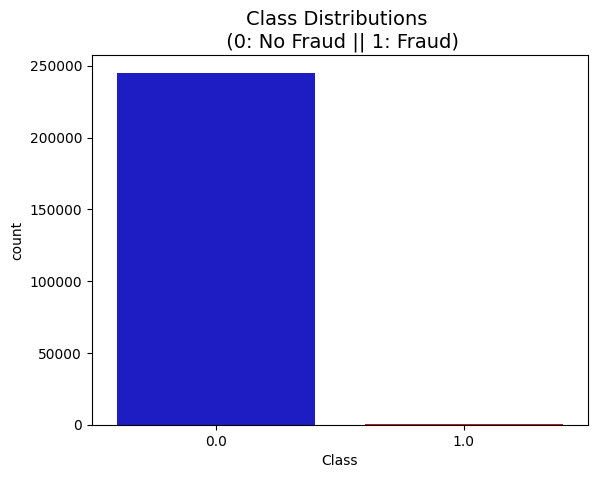

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df_credit, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

**Scaling and Distributing**

We scale the columns of Time and Amount.
We have to create a subsample of the dataframe in order to have an equal amount of Fraud and Non Fraud cases helping our algorithms to understand the pattern better that determines which transaction is fraud or not.

Subsample - it will be a dataframe ratio of 50/50 of fraud and non fraud transactions which means subsample will have same amount of transactions

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_credit['scaled_amount'] = rob_scaler.fit_transform(df_credit['Amount'].values.reshape(-1,1))
df_credit['scaled_time'] = rob_scaler.fit_transform(df_credit['Time'].values.reshape(-1,1))

df_credit.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
scaled_amount = df_credit['scaled_amount']
scaled_time = df_credit['scaled_time']

df_credit.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df_credit.insert(0, 'scaled_amount', scaled_amount)
df_credit.insert(1, 'scaled_time', scaled_time)

In [13]:
df_credit.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.707449,-1.004858,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.278897,-1.004858,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.803839,-1.004845,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.354333,-1.004845,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.630931,-1.004832,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
print('No Frauds', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('Frauds', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset


In [16]:
X = df_credit.drop('Class', axis=1)
y = df_credit['Class']

strat = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for fold, (train_index, test_index) in enumerate(strat.split(X, y)):
    print(f"\n Fold {fold + 1}")
    print("Train indices:", train_index[:10], "...", train_index[-3:])
    print("Test indices: ", test_index[:10], "...", test_index[-3:])

original_Xtrain = X.iloc[train_index]
original_Xtest = X.iloc[test_index]
original_ytrain = y.iloc[train_index]
original_ytest = y.iloc[test_index]


 Fold 1
Train indices: [27362 27627 27738 27749 29687 30100 30314 30384 30398 30442] ... [245597 245598 245599]
Test indices:  [0 1 2 3 4 5 6 7 8 9] ... [49176 49177 49178]

 Fold 2
Train indices: [0 1 2 3 4 5 6 7 8 9] ... [245597 245598 245599]
Test indices:  [27362 27627 27738 27749 29687 30100 30314 30384 30398 30442] ... [98280 98281 98282]

 Fold 3
Train indices: [0 1 2 3 4 5 6 7 8 9] ... [245597 245598 245599]
Test indices:  [73857 74496 74507 74794 75511 76555 76609 76929 77099 77348] ... [147371 147372 147373]

 Fold 4
Train indices: [0 1 2 3 4 5 6 7 8 9] ... [245597 245598 245599]
Test indices:  [142405 142557 143188 143333 143334 143335 143336 143728 143731 144104] ... [196500 196501 196502]

 Fold 5
Train indices: [0 1 2 3 4 5 6 7 8 9] ... [196500 196501 196502]
Test indices:  [167305 172787 176049 177195 178208 181966 182992 183106 184379 189587] ... [245597 245598 245599]


In [17]:
# Show class distribution for train and test
print("Training set class distribution:\n", original_ytrain.value_counts(normalize=True))
print("Testing set class distribution:\n", original_ytest.value_counts(normalize=True))

Training set class distribution:
 Class
0.0    0.998173
1.0    0.001827
Name: proportion, dtype: float64
Testing set class distribution:
 Class
0.0    0.998168
1.0    0.001832
Name: proportion, dtype: float64


In this dataset we will use Random UnderSampling which basically consists of removing data in order to have a more balanced dataset thus avoiding the models to overfit

In [18]:
#Since the classes are highly skewed we should make them equivalent in order to have a normal distribution of classes

# Shuffle the original dataset
df = df_credit.sample(frac=1, random_state=42)

# Get all fraud cases (minority class)
fraud_df = df[df['Class'] == 1]

# Undersample non-fraud cases to match the number of fraud cases
non_fraud_df = df[df['Class'] == 0].iloc[:len(fraud_df)]

# Combine both to get a balanced dataset
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle the new balanced dataset
new_df = normal_distributed_df.sample(frac=1, random_state=42).reset_index(drop=True)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.301744,-0.724215,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,...,1.001519,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0
1,-0.254563,-0.213335,-0.598611,0.799803,1.182873,-0.255847,0.890234,1.347027,0.223260,0.700396,...,-0.026650,-0.093723,-0.118443,0.115061,-1.081727,-0.517370,0.184564,0.308707,0.073249,0.0
2,-0.301744,-0.409178,-1.476893,2.122314,-1.229470,1.201849,-0.343264,-1.317704,-1.528142,-0.620953,...,0.276893,1.186036,-0.040215,-0.238930,0.110144,0.045418,-0.569232,0.481019,-0.047555,1.0
3,0.631067,-0.564338,-4.916300,1.628375,0.531015,0.486271,-1.831532,0.451442,-1.400167,-2.772051,...,-1.535334,2.526309,-0.817302,0.635846,0.568277,0.510956,-0.121711,-0.079616,0.430281,0.0
4,1.151683,0.765318,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1.0


Distribution of the Classes in the subsample dataset
Class
1.0    0.5
0.0    0.5
Name: count, dtype: float64


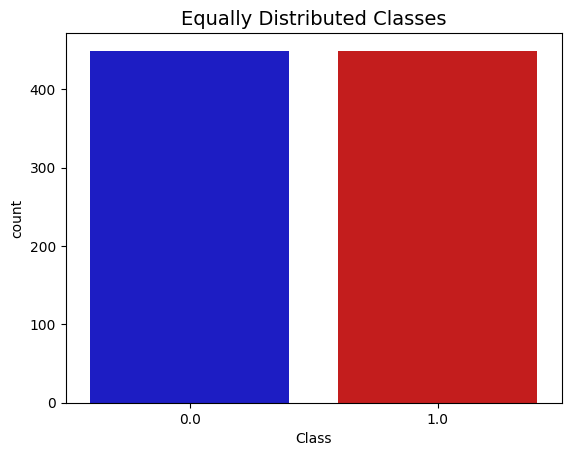

In [19]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Correlation Matrices**

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

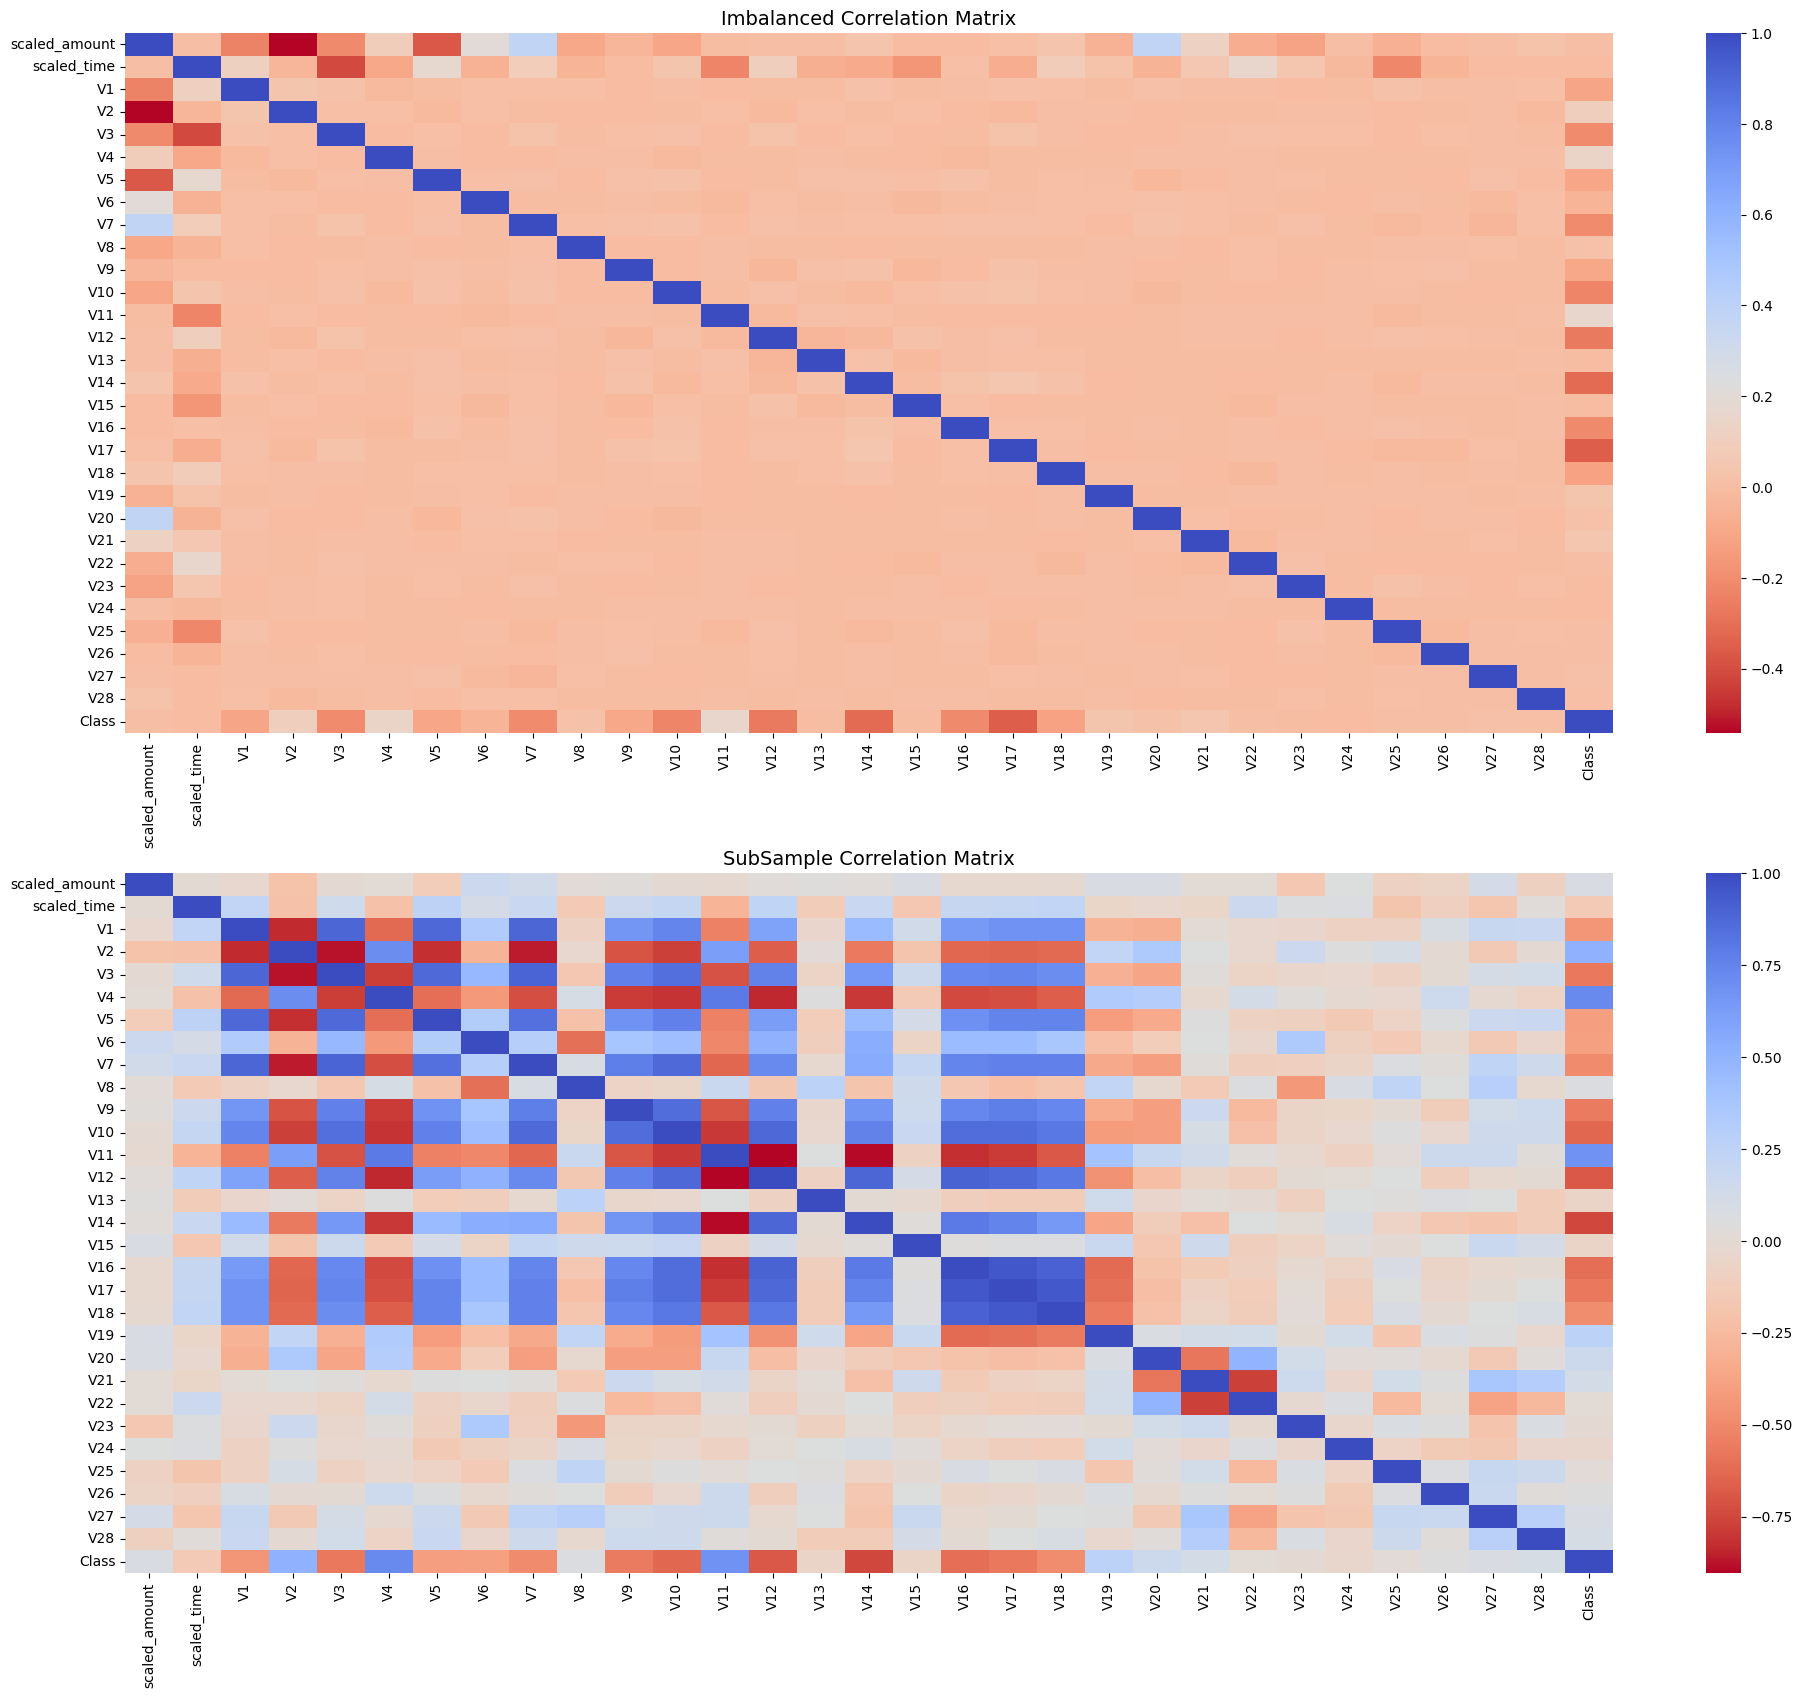

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

From the above SubSample Plot

A negative correlation with Class means as the feature value decreases the likelihood of fraud increases

The negative correlation features are V17, V14, V12, V10 and V16

Positive correlation with Class means
As the feature value increases, the probability of the transaction being fraudulent also increases.

The positive correlation features are V4, V11, V2, V19 and V7

| Feature Type                          | Fraud Indicators               | Non-Fraud Indicators               |
| ------------------------------------- | ------------------------------ | ---------------------------------- |
| **Positively correlated** (e.g., V4)  | **High feature value** → fraud | **Low feature value** → non-fraud  |
| **Negatively correlated** (e.g., V17) | **Low feature value** → fraud  | **High feature value** → non-fraud |


**Visualizing the Negative Correlated Features with Fraud and Non Fraud Cases**

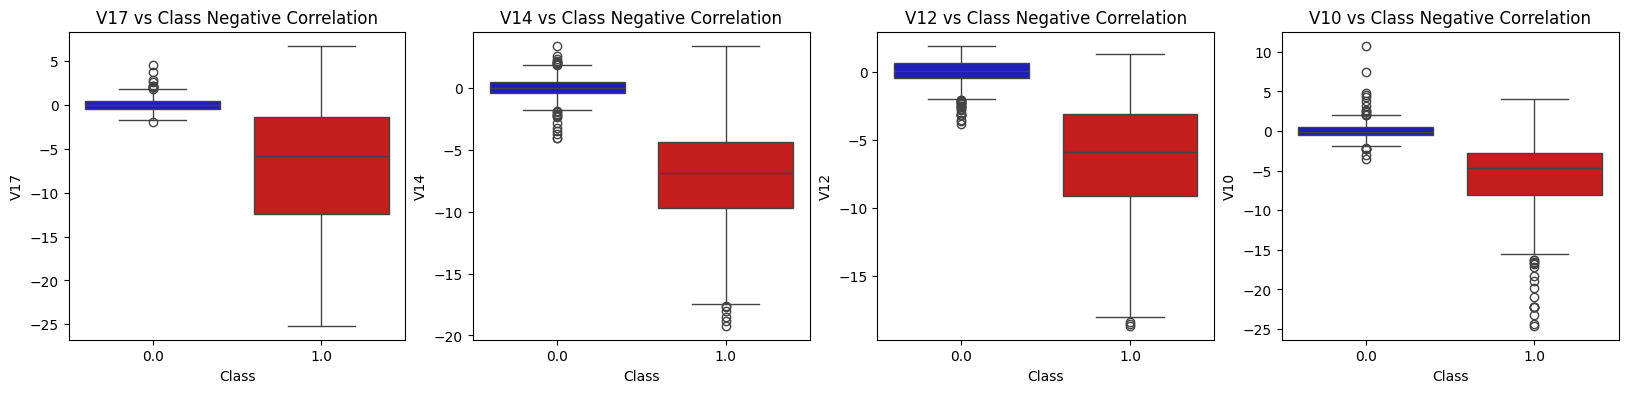

In [21]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

| Feature | For Fraud (`Class=1`)  | For Non-Fraud (`Class=0`) | Interpretation                         |
| ------- | ---------------------- | ------------------------- | -------------------------------------- |
| V17     | Mostly negative values | Around 0                  | Strong negative correlation with fraud |
| V14     | Negative, wide spread  | Around 0                  | Strong negative correlation with fraud |
| V12     | Negative and lower     | Slightly negative to 0    | Negative correlation with fraud        |
| V10     | Lower and more spread  | Positive to 0             | Negative correlation with fraud        |


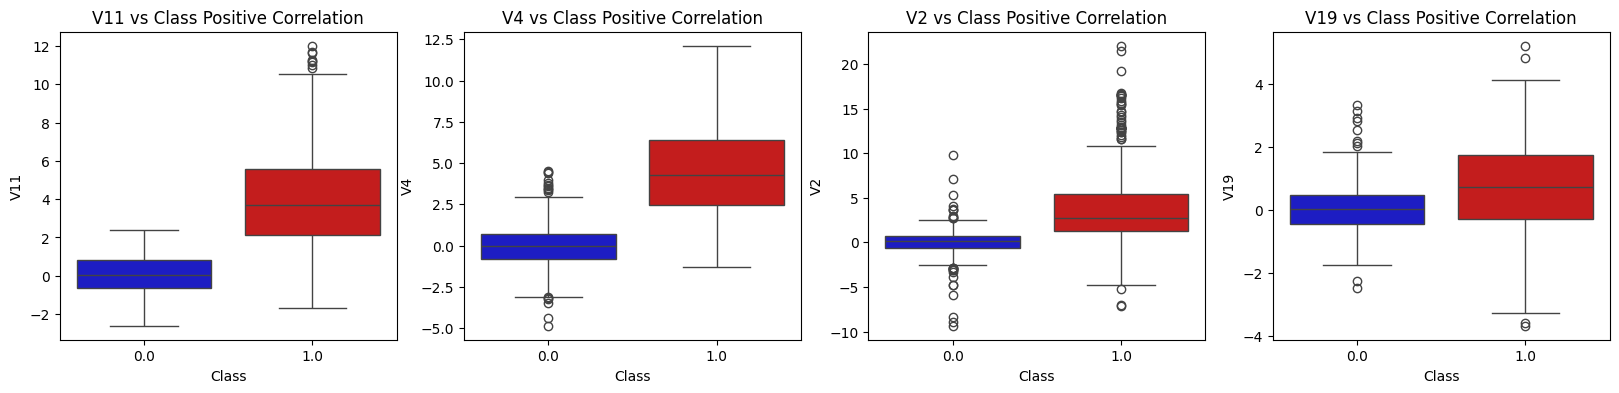

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

| Feature | For Fraud (`Class=1`)      | For Non-Fraud (`Class=0`)     | Interpretation                         |
| ------- | -------------------------- | ----------------------------- | -------------------------------------- |
| V11     | Higher values, more spread | Around 0 or slightly negative | Strong positive correlation with fraud |
| V4      | Higher and more spread     | Centered around 0             | Positive correlation with fraud        |
| V2      | Generally higher values    | Near 0 or slightly negative   | Positive correlation with fraud        |
| V19     | Positive and more spread   | Centered around 0 or negative | Positive correlation with fraud        |


**Anomaly Detection**

We have to remove the extreme outliers from the data that have high correlation. This will have positive impact on the accuracy of our models


In [25]:
# Removing Outliers (Highest Negative Correlated with Labels)
# Function to remove outliers based on IQR for fraud transactions, with before/after counts
def remove_outliers(df, feature):
    fraud_values = df[feature].loc[df['Class'] == 1].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # Identify outliers before removal
    outliers = df[(df['Class'] == 1) & ((df[feature] < lower) | (df[feature] > upper))]

    print(f"\nOutlier Summary for Feature: {feature}")
    print("-" * 50)
    print(f"{'Metric':<30} | {'Value'}")
    print("-" * 50)
    print(f"{'Q1 (25th percentile)':<30} | {q25:.4f}")
    print(f"{'Q3 (75th percentile)':<30} | {q75:.4f}")
    print(f"{'IQR (Q3 - Q1)':<30} | {iqr:.4f}")
    print(f"{'Cut-off (1.5 * IQR)':<30} | {cut_off:.4f}")
    print(f"{'Lower Bound':<30} | {lower:.4f}")
    print(f"{'Upper Bound':<30} | {upper:.4f}")
    print(f"{'Number of Outliers before removal':<30} | {len(outliers)}")
    print("-" * 50)

    rows_before = len(df)
    df = df.drop(outliers.index)
    rows_after = len(df)

    print(f"Total Rows before removal       : {rows_before}")
    print(f"Total Rows after removal        : {rows_after}")
    print(f"Number of rows removed (outliers): {rows_before - rows_after}")
    print("=" * 50)

    return df

features_to_clean = ['V14', 'V12', 'V10']
for feature in features_to_clean:
    new_df = remove_outliers(new_df, feature)



Outlier Summary for Feature: V14
--------------------------------------------------
Metric                         | Value
--------------------------------------------------
Q1 (25th percentile)           | -9.0727
Q3 (75th percentile)           | -4.3339
IQR (Q3 - Q1)                  | 4.7388
Cut-off (1.5 * IQR)            | 7.1082
Lower Bound                    | -16.1809
Upper Bound                    | 2.7742
Number of Outliers before removal | 1
--------------------------------------------------
Total Rows before removal       : 841
Total Rows after removal        : 840
Number of rows removed (outliers): 1

Outlier Summary for Feature: V12
--------------------------------------------------
Metric                         | Value
--------------------------------------------------
Q1 (25th percentile)           | -7.8890
Q3 (75th percentile)           | -2.7776
IQR (Q3 - Q1)                  | 5.1113
Cut-off (1.5 * IQR)            | 7.6670
Lower Bound                    | -15.5560


**To Detect Outlier**

Lower bound = Q1 - 1.5 * IQR

Upper bound = Q3 + 1.5 * IQR

If any fraud transaction value below the Lower Bound and higher than the Upper bound then it is considered to be an outlier

In [26]:
# Removing Outliers (Highest Positive Correlated with Labels)
# Function to remove outliers based on IQR for fraud transactions, with before/after counts
def remove_outliers(df, feature):
    fraud_values = df[feature].loc[df['Class'] == 1].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # Identify outliers before removal
    outliers = df[(df['Class'] == 1) & ((df[feature] < lower) | (df[feature] > upper))]

    print(f"\nOutlier Summary for Feature: {feature}")
    print("-" * 50)
    print(f"{'Metric':<30} | {'Value'}")
    print("-" * 50)
    print(f"{'Q1 (25th percentile)':<30} | {q25:.4f}")
    print(f"{'Q3 (75th percentile)':<30} | {q75:.4f}")
    print(f"{'IQR (Q3 - Q1)':<30} | {iqr:.4f}")
    print(f"{'Cut-off (1.5 * IQR)':<30} | {cut_off:.4f}")
    print(f"{'Lower Bound':<30} | {lower:.4f}")
    print(f"{'Upper Bound':<30} | {upper:.4f}")
    print(f"{'Number of Outliers before removal':<30} | {len(outliers)}")
    print("-" * 50)

    rows_before = len(df)
    df = df.drop(outliers.index)
    rows_after = len(df)

    print(f"Total Rows before removal       : {rows_before}")
    print(f"Total Rows after removal        : {rows_after}")
    print(f"Number of rows removed (outliers): {rows_before - rows_after}")
    print("=" * 50)

    return df

 # Features positively correlated with the label
features_to_clean_pos = ['V11', 'V4', 'V2', 'V19']
for feature in features_to_clean_pos:
    new_df = remove_outliers(new_df, feature)


Outlier Summary for Feature: V11
--------------------------------------------------
Metric                         | Value
--------------------------------------------------
Q1 (25th percentile)           | 1.8641
Q3 (75th percentile)           | 4.5650
IQR (Q3 - Q1)                  | 2.7009
Cut-off (1.5 * IQR)            | 4.0514
Lower Bound                    | -2.1873
Upper Bound                    | 8.6163
Number of Outliers before removal | 3
--------------------------------------------------
Total Rows before removal       : 814
Total Rows after removal        : 811
Number of rows removed (outliers): 3

Outlier Summary for Feature: V4
--------------------------------------------------
Metric                         | Value
--------------------------------------------------
Q1 (25th percentile)           | 2.1678
Q3 (75th percentile)           | 5.3522
IQR (Q3 - Q1)                  | 3.1844
Cut-off (1.5 * IQR)            | 4.7766
Lower Bound                    | -2.6087
Upper B

**MODELLING**

In [27]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [30]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [37]:
from sklearn.model_selection import cross_val_score


scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

results = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)  # optional for some models, but safe to include
    scores = {}
    scores['Classifier'] = classifier.__class__.__name__

    for metric in scoring_metrics:
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring=metric)
        scores[metric.capitalize()] = round(cv_scores.mean(), 4)

    results.append(scores)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the table
results_df

,Classifier,Accuracy,F1,Precision,Recall,Roc_auc
0,LogisticRegression,0.9318,0.9167,0.9524,0.8864,0.9689
1,KNeighborsClassifier,0.9237,0.9044,0.9659,0.8525,0.9598
2,SVC,0.9237,0.9031,0.9742,0.8448,0.9723
3,DecisionTreeClassifier,0.8913,0.8707,0.8695,0.8827,0.8850


In [32]:
#Using Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [33]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.35%
Knears Neighbors Cross Validation Score 93.19%
Support Vector Classifier Cross Validation Score 92.7%
DecisionTree Classifier Cross Validation Score 91.72%
